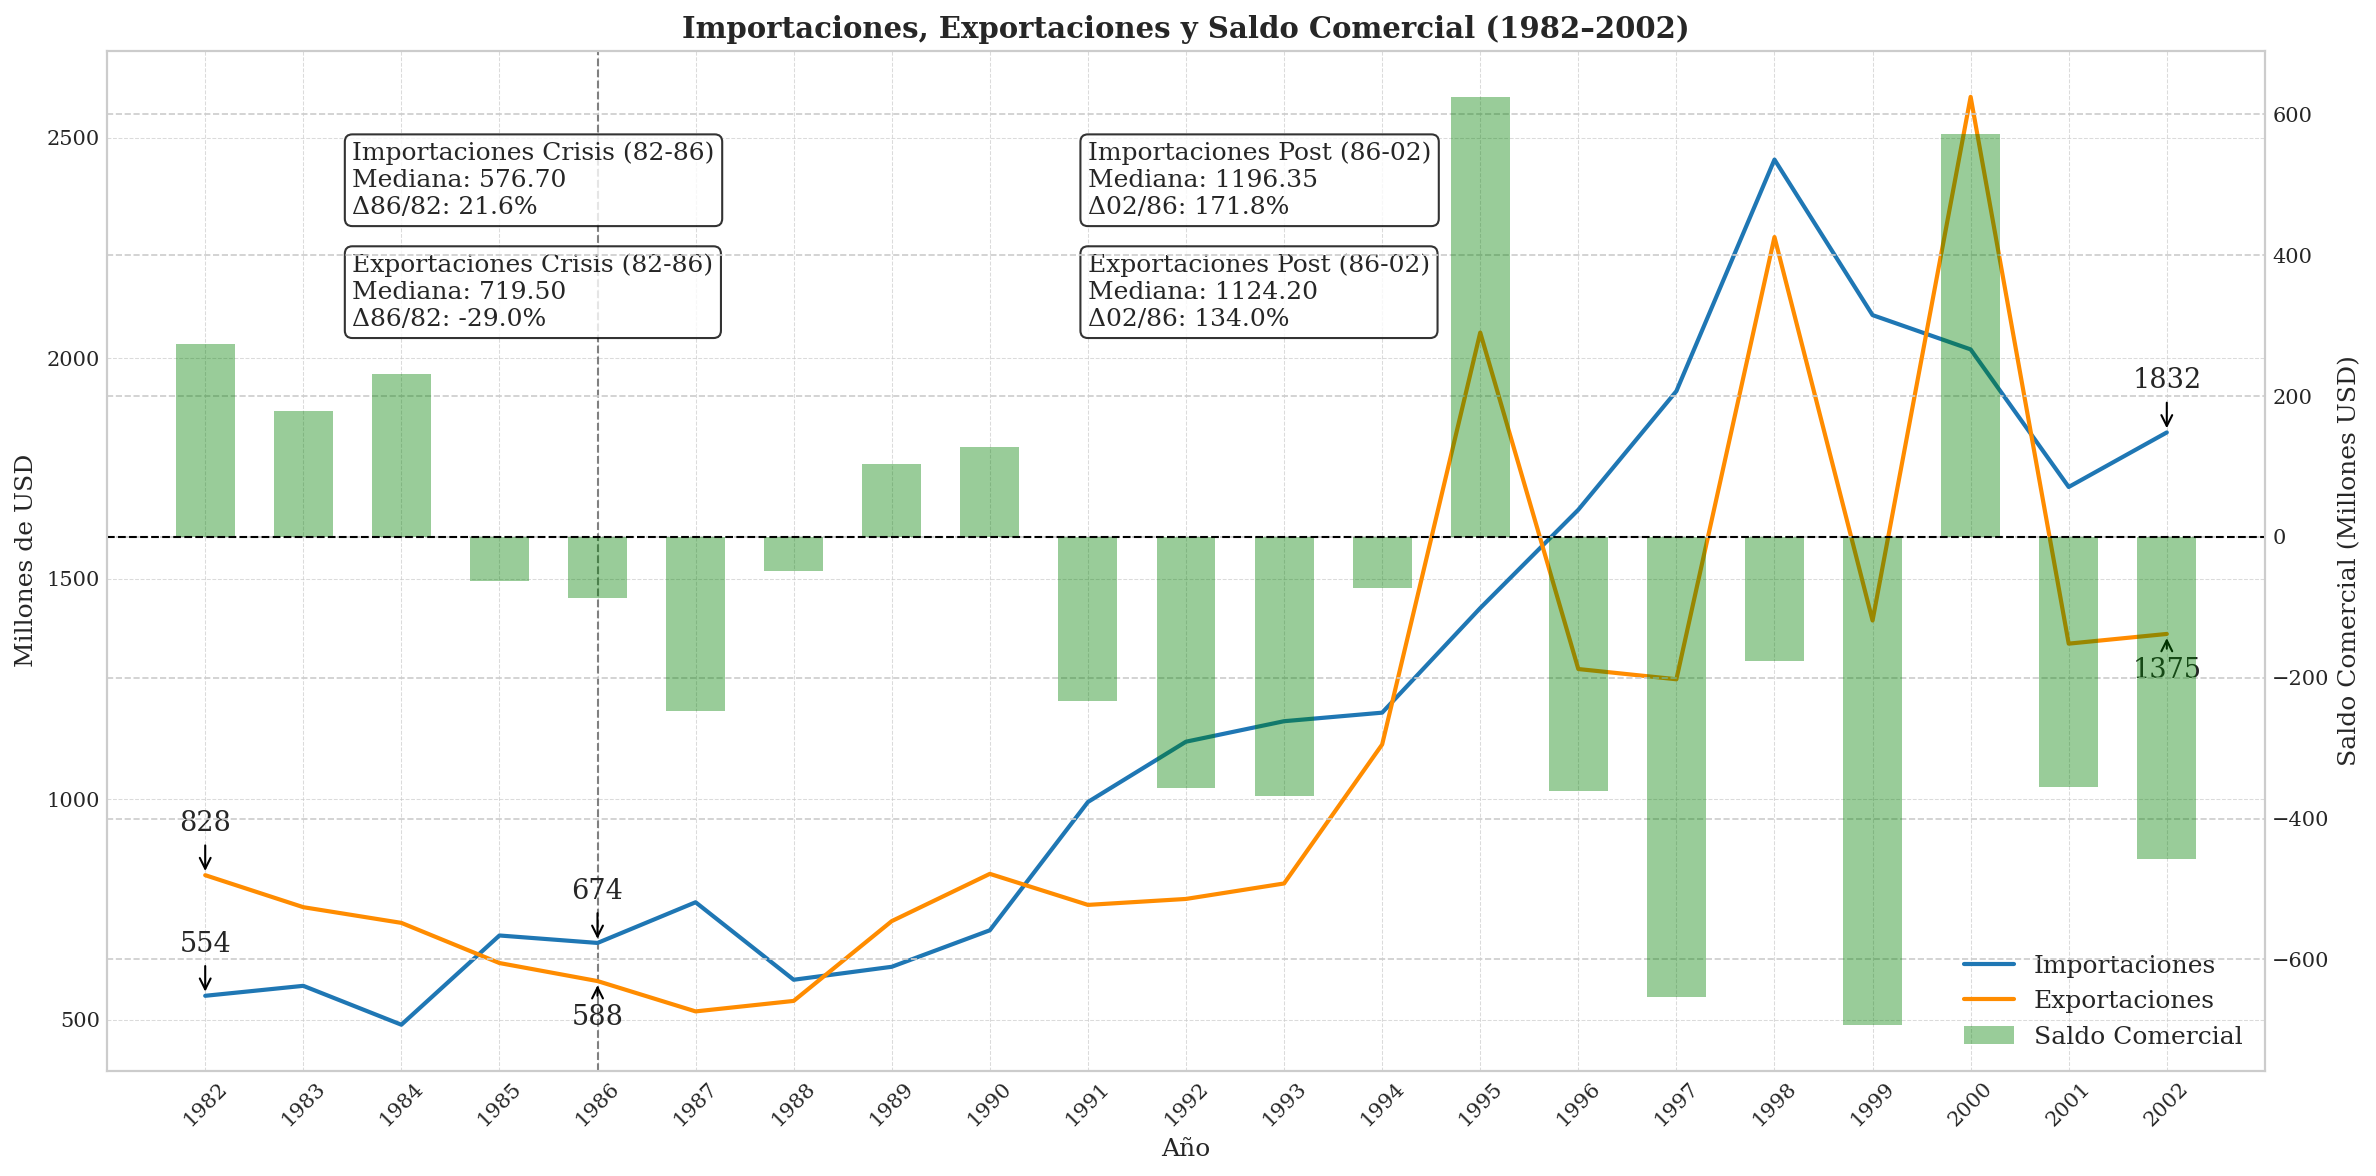

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

# --- Directorio de salida ---
output_dir = "../../../assets/tesis/neoliberalismo/serie_completa"
os.makedirs(output_dir, exist_ok=True)

# --- Estilo profesional ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family'    : 'serif',
    'font.size'      : 12,
    'axes.titlesize' : 16,
    'axes.labelsize' : 14,
    'grid.linestyle' : '--',
    'lines.linewidth': 2,
    'figure.dpi'     : 150,
    'savefig.bbox'   : 'tight'
})

# --- Carga de datos ---
conn = sqlite3.connect('../../../db/proyectomacro.db')
df = pd.read_sql_query("SELECT * FROM balanza_comercial", conn)
conn.close()
df.set_index('año', inplace=True)
df = df.loc[1982:2002]
df_full = df

# --- Definir periodos ---
df_crisis = df.loc[1982:1986]
df_post   = df.loc[1986:2002]

# --- Funciones estadísticas adaptadas ---
def cuadro_estadisticas(serie, label):
    med   = serie.loc[1982:1986].median()
    delta = (serie.loc[1986] - serie.loc[1982]) / serie.loc[1982] * 100
    return f"{label} Crisis (82‑86)\nMediana: {med:.2f}\nΔ86/82: {delta:.1f}%"

def cuadro_estadisticas_post(serie, label):
    med   = serie.loc[1986:2002].median()
    delta = (serie.loc[2002] - serie.loc[1986]) / serie.loc[1986] * 100
    return f"{label} Post (86‑02)\nMediana: {med:.2f}\nΔ02/86: {delta:.1f}%"

# --- Offsets para anotaciones ---
annotation_offsets = {
    'importaciones': {
        1982: (0, 100),
        1986: (0, 100),
        2002: (0, 100),
    },
    'exportaciones': {
        1982: (0, 100),
        1986: (0, -100),
        2002: (0, -100),
    },
}

# --- Crear figura y ejes ---
fig, ax = plt.subplots(figsize=(16, 8))

ax2 = ax.twinx()

# --- Trazado segmentado ---
l1, = ax.plot(df.index, df['importaciones'],
              label='Importaciones', linewidth=2, zorder=3)
l3, = ax.plot(df.index, df['exportaciones'],
              label='Exportaciones', color='#FF8C00', linewidth=2, zorder=3)


# --- Barras de saldo comercial ---
b = ax2.bar(df_full.index, df_full['saldo_comercial'],
            label='Saldo Comercial', width=0.6, alpha=0.4, zorder=1, color='green')
ax2.axhline(0, color='black', linestyle='--', linewidth=1, zorder=2)

# --- Línea de separación ---
ax.axvline(1986, color='gray', linestyle='--', linewidth=1)

# --- Anotaciones claves ---
for yr in (1982, 1986, 2002):
    imp = df_full.loc[yr, 'importaciones']
    exp = df_full.loc[yr, 'exportaciones']
    dx_i, dy_i = annotation_offsets['importaciones'].get(yr, (0, imp * 0.05))
    dx_e, dy_e = annotation_offsets['exportaciones'].get(yr, (0, exp * 0.05))
    ax.annotate(f"{imp:.0f}", xy=(yr, imp),
                xytext=(yr + dx_i, imp + dy_i),
                arrowprops=dict(arrowstyle='->'),
                ha='center', fontsize=13)
    ax.annotate(f"{exp:.0f}", xy=(yr, exp),
                xytext=(yr + dx_e, exp + dy_e),
                arrowprops=dict(arrowstyle='->'),
                ha='center', fontsize=13)

# --- Cuadros de estadísticas ---
ax.text(1983.5, df_full['importaciones'].max() * 0.95,
        cuadro_estadisticas(df_crisis['importaciones'], 'Importaciones'),
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
ax.text(1991, df_full['importaciones'].max() * 0.95,
        cuadro_estadisticas_post(df_post['importaciones'], 'Importaciones'),
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.text(1983.5, df_full['exportaciones'].max() * 0.80,
        cuadro_estadisticas(df_crisis['exportaciones'], 'Exportaciones'),
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
ax.text(1991, df_full['exportaciones'].max() * 0.80,
        cuadro_estadisticas_post(df_post['exportaciones'], 'Exportaciones'),
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# --- Ejes y leyenda unificada ---
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Millones de USD', fontsize=12)
ax2.set_ylabel('Saldo Comercial (Millones USD)', fontsize=12)
ax.set_xlim(1981, 2003)
ax.set_xticks(range(1982, 2003))
ax.tick_params(axis='x', labelrotation=45)

ax.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
handles = [l1, l3, b]
labels  = [h.get_label() for h in handles]
ax.legend(handles, labels, loc='lower right', framealpha=0.9)
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# --- Título y guardado ---
ax.set_title('Importaciones, Exportaciones y Saldo Comercial (1982–2002)', fontweight='bold', fontsize=14)
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "import_export_balance_82_02.png"))
plt.show()
